In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [285]:
df=pd.read_csv('../data/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [287]:
df.select_dtypes(include=('object')).columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [256]:
def clean_data(df):
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    df.drop(['show_id',''],inplace=True,axis=1)
    return df

In [257]:
df=clean_data(df)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5332 non-null   object
 1   title         5332 non-null   object
 2   director      5332 non-null   object
 3   cast          5332 non-null   object
 4   country       5332 non-null   object
 5   release_year  5332 non-null   int64 
 6   rating        5332 non-null   object
 7   duration      5332 non-null   object
 8   listed_in     5332 non-null   object
 9   description   5332 non-null   object
dtypes: int64(1), object(9)
memory usage: 458.2+ KB


In [259]:
df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [260]:
df.head(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


<BarContainer object of 2 artists>

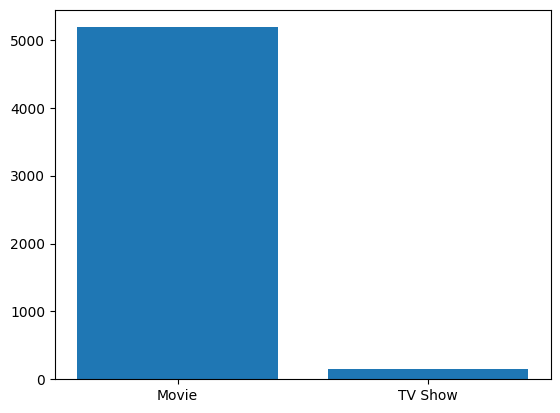

In [261]:
plt.bar(x=df['type'].value_counts().index,height=df['type'].value_counts().values)

In [262]:
data=df.groupby(['type','country']).size().reset_index(name='count').sort_values(ascending=False,by='count')
data=data.head(13)
data

,type,country,count
481,Movie,United States,1819
192,Movie,India,868
403,Movie,United Kingdom,164
43,Movie,Canada,104
110,Movie,Egypt,90
349,Movie,Spain,84
287,Movie,Nigeria,84
212,Movie,Indonesia,76
391,Movie,Turkey,74
249,Movie,Japan,73


In [263]:
top_country=df['country'].value_counts(ascending=False).head(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Egypt'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Philippines'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Mexico'),
  Text(13, 0, 'United Kingdom, United States'),
  Text(14, 0, 'United States, Canada'),
  Text(15, 0, 'Hong Kong'),
  Text(16, 0, 'South Korea'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Germany'),
  Text(19, 0, 'Thailand')])

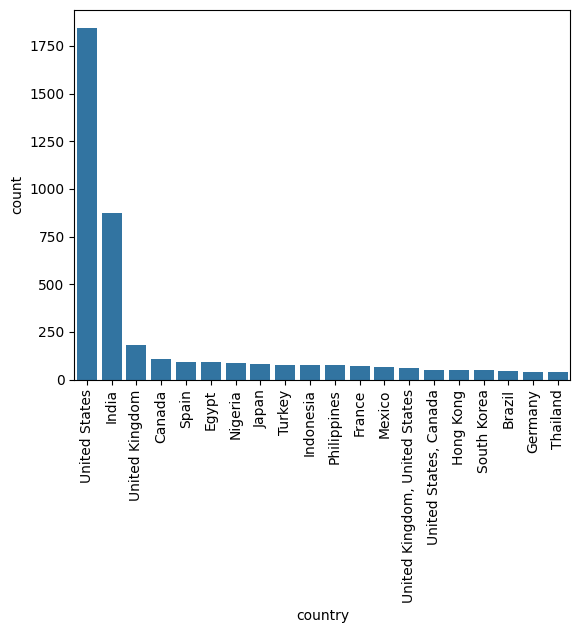

In [264]:
sns.countplot(x=df['country'],order=top_country.index)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Egypt'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Philippines'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Mexico'),
  Text(13, 0, 'United Kingdom, United States'),
  Text(14, 0, 'United States, Canada'),
  Text(15, 0, 'Hong Kong'),
  Text(16, 0, 'South Korea'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Germany'),
  Text(19, 0, 'Thailand')])

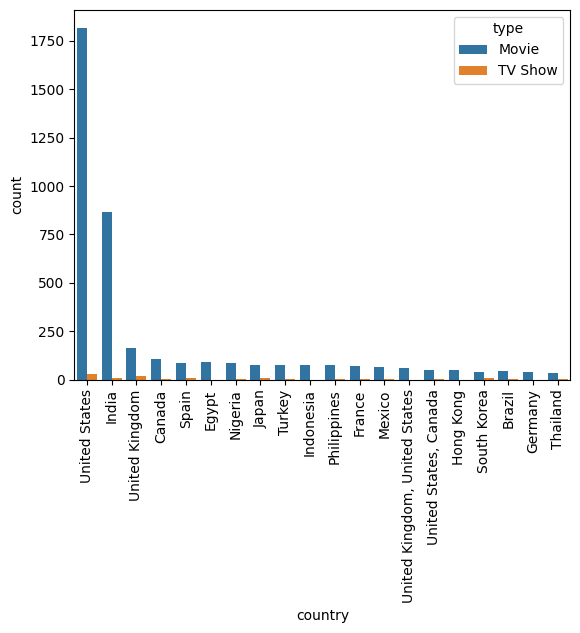

In [265]:
sns.countplot(x=df['country'],order=top_country.index,hue=df['type'])
plt.xticks(rotation=90)

In [266]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [267]:
duration_df= df['duration'].value_counts().head(13)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '94 min'),
  Text(1, 0, '93 min'),
  Text(2, 0, '97 min'),
  Text(3, 0, '95 min'),
  Text(4, 0, '90 min'),
  Text(5, 0, '91 min'),
  Text(6, 0, '102 min'),
  Text(7, 0, '96 min'),
  Text(8, 0, '92 min'),
  Text(9, 0, '98 min'),
  Text(10, 0, '99 min'),
  Text(11, 0, '1 Season'),
  Text(12, 0, '101 min')])

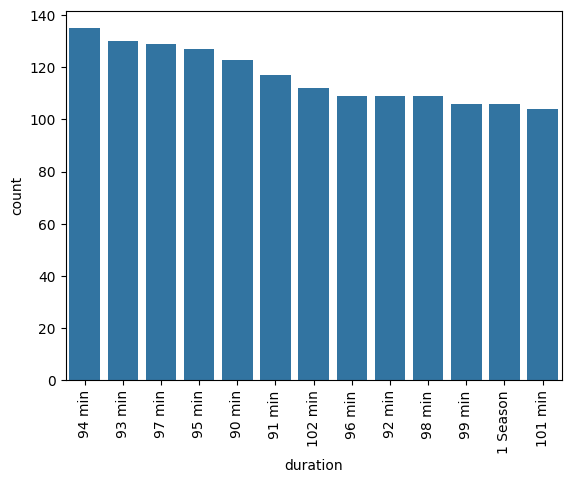

In [268]:
sns.countplot(x=df['duration'],order=duration_df.index)
plt.xticks(rotation=90)

In [269]:
df.head(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [270]:
df['listed_in'].value_counts().head(15)

listed_in
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Children & Family Movies                            132
Action & Adventure                                  127
Dramas, International Movies, Thrillers             125
Comedies, Dramas, Independent Movies                114
Action & Adventure, Dramas, International Movies    111
Name: count, dtype: int64

<Axes: ylabel='listed_in'>

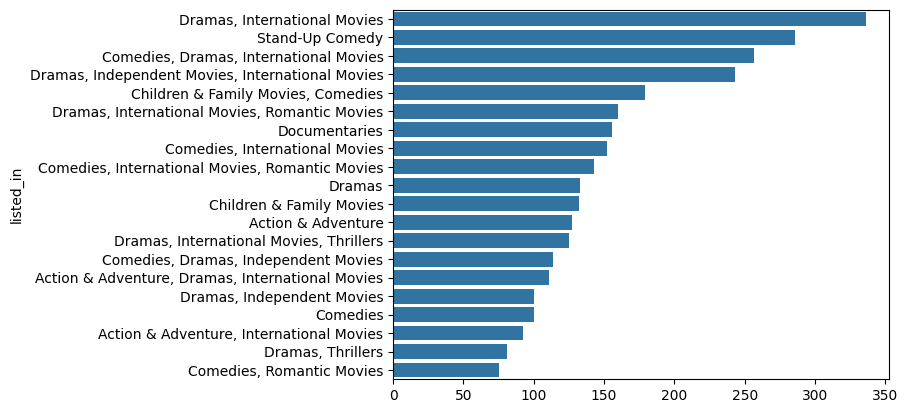

In [271]:
# list_df=df['listed_in'].str.split(',')
df['genres'] = df['listed_in'].str.split(', ')
genres = df['listed_in'].explode().value_counts().head(20)
sns.barplot(x=genres.values,y=genres.index)

In [272]:
str_col=df.select_dtypes(include=('object')).columns
str_col

Index(['type', 'title', 'director', 'cast', 'country', 'rating', 'duration',
       'listed_in', 'description', 'genres'],
      dtype='object')

In [273]:
le=LabelEncoder()
for col in str_col:
    df[col]=le.fit_transform(df[col].astype('str'))

In [274]:
x = df.drop(['type'], axis='columns')
y = df[['type']]

In [275]:
x

,title,director,cast,country,release_year,rating,duration,listed_in,description,genres
7,3686,1309,2721,536,1993,8,27,238,3389,239
8,4399,256,3253,409,2021,6,187,89,795,92
9,4733,3619,3259,490,2021,4,5,156,920,165
12,2155,695,2987,167,2021,8,29,245,1353,253
24,2157,3183,3843,195,1998,6,72,179,5063,180
...,...,...,...,...,...,...,...,...,...,...
8801,5305,2201,273,403,2015,8,194,251,3558,252
8802,5308,857,3135,490,2007,5,64,205,604,208
8804,5310,3164,2203,490,2009,5,185,166,3224,171
8805,5312,2817,4806,490,2006,3,185,97,2210,108


In [276]:
sc=StandardScaler()
X=sc.fit_transform(x)

In [277]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [278]:
def model_training(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"The accuracy of the {model} model on the test set is: {accuracy}")
    print(classification_report(y_test,predictions))
    return accuracy
    

In [279]:
models=[
    SVC(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier()
]

In [280]:
model_name=[]
accuracies=[]


In [281]:
for model in models:
    acc=model_training(model,X_train,y_train,X_test,y_test)
    model_name.append(model.__class__.__name__)
    accuracies.append(acc)

/Users/akashmukherjee/Programming/Practise ML/Netflix/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akashmukherjee/Programming/Practise ML/Netflix/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/akashmukherjee/Programming/Practise ML/Netflix/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

The accuracy of the SVC() model on the test set is: 0.9700093720712277
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1035
           1       0.00      0.00      0.00        32

    accuracy                           0.97      1067
   macro avg       0.49      0.50      0.49      1067
weighted avg       0.94      0.97      0.96      1067

The accuracy of the DecisionTreeClassifier() model on the test set is: 0.993439550140581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       0.93      0.84      0.89        32

    accuracy                           0.99      1067
   macro avg       0.96      0.92      0.94      1067
weighted avg       0.99      0.99      0.99      1067

The accuracy of the GaussianNB() model on the test set is: 0.9700093720712277
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1035

In [282]:
pred_data=pd.DataFrame(model_name,accuracies).sort_index(ascending=False)
pred_data

,0
0.996251,RandomForestClassifier
0.993440,DecisionTreeClassifier
0.970009,SVC
0.970009,GaussianNB


### Best model is DecisionTreeClassifier